In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random

In [7]:
#Model Variables and Parameters
age_average_x=20
# Current average ages in year for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in mile for underground and overhead transission and distribution lines
number_circuit= 650
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
r=0.1
# Discount rate=10%
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
underground_line={'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#overhead_line={'underground':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#underground_line={'underground':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# underground= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line
###

In [8]:
shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_age_x)

0.2


In [9]:
scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
print(scale_age_x)

5.0


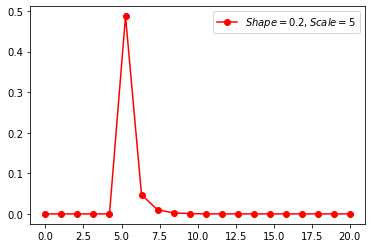

In [10]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits ages

In [11]:
shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_length_x)

8.0


In [12]:
scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
print(scale_length_x)

0.125


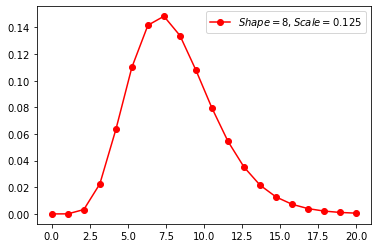

In [13]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_length_x, scale_length_x)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

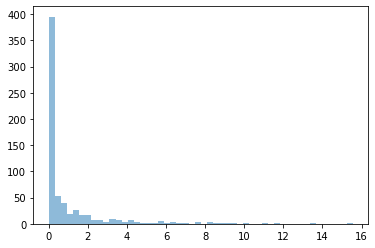

[2.08895271e-01 1.69172671e-03 2.11304146e-02 1.08527236e-02
 4.94596957e-03 1.90397505e-01 6.97232268e-01 6.05389099e-01
 1.84394726e+00 2.02924562e-02 3.89703002e-03 3.78258034e-04
 3.01098035e-01 5.42160253e-03 5.03520628e-05 1.02879489e-01
 5.69250877e-03 3.23493328e+00 1.06325579e-07 3.35246546e-01
 1.19038010e+00 5.50627172e-02 6.35470066e-06 2.68711787e-06
 3.33382374e-04 1.87595619e+00 2.96721676e-05 1.03201608e+00
 6.46273359e-04 4.28147850e-01 2.28646807e-01 9.71204924e+00
 2.25247522e-03 7.33115177e-08 5.11861816e+00 1.18531076e-02
 2.38463002e+00 4.54838149e-02 4.74947753e+00 5.83638465e-04
 1.13877800e-01 2.06980600e+00 3.17808682e-02 2.44176570e+00
 1.10257932e+00 3.65566305e-02 3.01887583e-02 3.41862962e-01
 5.91929530e-01 4.46319697e+00 1.21773824e-02 2.60422751e+00
 8.37893459e-01 2.76115274e-02 1.87723450e+00 1.65689434e-02
 7.75536566e-01 1.94212776e-02 1.09439374e+00 2.37074979e-01
 4.13799102e-03 1.14549080e-02 5.90808199e-04 2.51412578e-02
 7.12269068e-04 8.796454

In [14]:
age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year

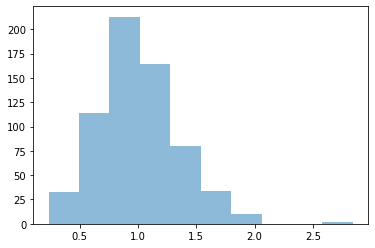

In [15]:
lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5)
plt.show()
#print (lengths)
#Randomly determined circuit's ages in the base year
### I guess these numbers are not correct because I do not expect to see such circuit's ages from a gamma distribution with an average age 20.

In [42]:
#Defining Circuit class with a new approach: ommiting for t from --- to --- from class methods.
###I still do not know without using for loop, how I can manage to generate some of the required outputs.
class Circuit:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        #self.replcost_rate=self.set_replcost_rate_array
        if self.underground[0]==1:
            self.replcost_rate=[underground_line['replcost']]
        else:
            self.replcost_rate=[overhead_line['replcost']]       
        self.capex=[0]
        self.opex=[0]
        self.new_underground_length=[0]
        
    ###Lifecycle Infrastructure Costs:
    def get_underground_baseyear(self):
        return (self.underground[0])
    # Determining circuit's overhead or underground status in the base years 
    def get_age_baseyear(self):
        return (self.age[0])
    # Determining circuit's age in the base year
    def get_length(self):
        return (self.length)
    # Determining circuit's length
    def add_age(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[-1])
        else:
            self.age.append(1)
            self.underground.append(1)
    # Adding one year to the age of circuit, compare it to the lifespan and append this age to age list. Also append underground status to its list.
    def get_underground_array(self):
        return(self.underground)
    # Returning underground list
    def get_age_array(self):
        return(self.age)
    # Returning ages list   
    def add_replcost_intrest_rate(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
            replcost_baseyear=underground_line['replcost']
            replcost_growth_rate_x=underground_line['replcost_growth_rate']
        else:
            lifespan_x= int(overhead_line['lifespan'])
            replcost_baseyear=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        if (self.age[-1])==1:
            replcost_x_new=underground_line['replcost']*((1+replcost_growth_rate_x)**(len(self.age)-1))
            self.replcost_rate.append(replcost_x_new)
        else:
            replcost_x_new=(self.replcost_rate[-1])+(replcost_growth_rate_x)*(self.replcost_rate[-1])
            self.replcost_rate.append(replcost_x_new)
        return(self.replcost_rate)
    #Adding interest rate to the replacement cost based on a year and also coonsidering different replacementcost rate when underground=1    
    def capex_calculation(self):
        if (self.age[-1])==1:
            length=self.length
            replcost_rate=self.replcost_rate[-1]
            replcost_new=(replcost_rate)*(length)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    #Determining capital expenses which is replacement cost for each circuit based on the rate of replacement cost in that year and length of the circuit.
    def opex_calculation(self):
        underground=self.underground[-1]
        if underground==1:
            om_percentage_replcost=underground_line['om_percentage_replcost']
        else:
            om_percentage_replcost=overhead_line['om_percentage_replcost']
        #self.add_replcost_intrest_rate()
        replcost_rate=self.replcost_rate[-1]
        opex_new=(om_percentage_replcost)*(replcost_rate)
        self.opex.append(opex_new)
        return(self.opex)
        #Determining operation and maintanace expenses which is a fraction of replacement rate for each circuit. 

In [43]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    print(circuit_i.get_underground_baseyear())
    print(circuit_i.get_age_baseyear())
    print(circuit_i.get_length())
    for t in range (200):
        circuit_i.add_age()
        circuit_i.add_replcost_intrest_rate()
        circuit_i.capex_calculation()
        circuit_i.opex_calculation()
    print(circuit_i.get_underground_array())
    print(circuit_i.get_age_array())
    print(circuit_i.replcost_rate)
    print(circuit_i.capex)
    print(circuit_i.opex)
#For each of circuits, 1st number shows its underground status in the baseyear
#2nd number shows its age in the baseyear
#3rd number shows its length 
#4th array shows its underground status in different years
#5th array shows its age in different years
#6th array shows its raplacement_rate in different years (it is just a potential rate using to calculate real numbers in next array)
#7th array shows its raplacement cost in different years
#7th array shows its operation and maitenance cost in different years (I do not know why it just return zeros, it should have numbers for all the years)

1
0.00016629139897508406
0.8458122635143565
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.00016629139897508406, 1.000166291398975, 2.0001662913989753, 3.0001662913989753, 4.000166291398975, 5.000166291398975, 6.000166291398975, 7.000166291398975, 8.000166291398976, 9.000166291398976, 10.000166291398976, 11.000166291398976, 12.000166291398976, 13.000166291398976, 14.000166291398976, 15.000166291398976, 16.000166291398976, 17.00016629139

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    for t in range (200):
        circuit_i.add_age()
    A=circuit_i.get_underground_array().copy()
    print(A)
    print(circuit_i.get_age_array())

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.4025600910809293, 1.4025600910809293, 2.4025600910809293, 3.4025600910809293, 4.402560091080929, 5.402560091080929, 6.402560091080929, 7.402560091080929, 8.402560091080929, 9.402560091080929, 10.402560091080929, 11.402560091080929, 12.402560091080929, 13.402560091080929, 14.402560091080929, 15.402560091080929, 16.40256009108093, 17.40256009108093, 18.40256009108093, 19.40256009108093, 20.40

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.08307173248145615, 1.083071732481456, 2.0830717324814563, 3.0830717324814563, 4.083071732481456, 5.083071732481456, 6.083071732481456, 7.083071732481456, 8.083071732481457, 9.083071732481457, 10.083071732481457, 11.083071732481457, 12.083071732481457, 13.083071732481457, 14.083071732481457, 15.083071732481457, 16.083071732481457, 17.083071732481457, 18.083071732481457, 19.083071732481457, 2

In [33]:
class Circuit2:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        
###Lifecycle Infrastructure Costs:
    def get_underground(self):
        return (self.underground)
    # Randomly determining status of overhead or underground of circuit
    def get_age_baseyear(self):
        #random.seed(1)
        #self.age= np.random.gamma(shape_age_x, scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year
    def get_length_baseyear(self):
        #random.seed(1)
        #self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year
###Three above methods are defined to identify length, age and overhead or underground, which are three atributes of a circuit.
    
    # def set_lifespan(): # SET lifespan separately
    def get_age_array(self):
        underground= self.underground[-1]
        if underground==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif underground==1:
            lifespan_x= int(underground_line['lifespan'])
        #age_i_baseyear= self.age[0] #self.get_age_baseyear()
        #age_i_t=0
        #age_i_t_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            age=(self.age[-1])
            if age<(lifespan_x-1):
                age+=1
                self.age.append(age)
                self.underground.append(self.underground[-1])
            else:
                self.age.append(1)
                self.underground.append(1)
                #age_i_t=(age_i_baseyear)+(t-baseyear)
        return(self.age)    
    def get_current_age(self,t):
        ages_list=self.get_age_array()
        current_age=ages_list[t-baseyear]
        return(current_age)
    # Determining list of circuit's ages based on different ts
    def get_replcost_x_t(self):
        underground= self.underground[-1]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif underground==1:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        #else:
            #lifespan_x=0
            #replecost_x=0
            #replcost_growth_rate_x=0
        replcost_x_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            if t==baseyear:
                replcost_x_t= replecost_x
                replcost_x_array.append(replcost_x_t)
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-baseyear)*(replecost_x)
                replcost_x_array.append(replcost_x_t)
        return (replcost_x_array)
    # Determining list of replacement cost for circuite i from line x based on different ts.
    def get_capex_StatusQuo_i(self): 
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        length=self.length
        capex_StatusQuo_i=0
        capex_StatusQuo_list=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((replcost_x_t)*(length))/((1+r)**(t-baseyear))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
                capex_StatusQuo_list.append(capex_StatusQuo_i)
            else:
                capex_StatusQuo_i=0
                capex_StatusQuo_list.append(capex_StatusQuo_i)
        return (sum(capex_StatusQuo_list))
    #Determining list of Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def get_opex_x_t(self):
        underground= self.underground[-1]
        age_i=self.get_age_array()
        replcost_x=self.get_replcost_x_t()
        if underground==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif underground==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost_x=0
        opex_x_t_array=[]
        opex_x_t=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            age_i_t=age_i[t-baseyear]
            replcost_x_t=replcost_x[t-baseyear]
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            else:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            #else:
                #None
        return (opex_x_t_array)
    #Annual operation and maintenance expenses for each line
    def get_opex_StatusQuo_i(self):
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        opex_StatusQuo_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            opex_x_t=opex_x[t-baseyear]
            opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def get_lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        capex_StatusQuo_i=self.get_capex_StatusQuo_i()
        opex_StatusQuo_i=self.get_opex_StatusQuo_i()
        lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
        lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def get_first_retire_i(self):
        age_baseyear_i=self.age[0]
        underground= self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x= underground_line['lifespan']
        first_retire_i=(lifespan_x)-(age_baseyear_i)+baseyear
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def get_capex_underground_i(self):
        #underground= self.underground[0]
        #if underground==0:
            #underground==1
        length_i=self.get_length_baseyear()
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        capex_underground_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((replcost_x_t)*(length_i))/((1+r)**(t-baseyear))
                capex_underground_i+=(capex_i)
        return (capex_underground_i)
    #Undergrounding capital expenses
    def get_opex_underground_i (self):
        underground=self.underground[-1]
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        first_retire_i=self.get_first_retire_i()
        opex_underground_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            opex_x_t=opex_x[t-baseyear]
            if  underground==1:
                opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    underground==1
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def get_lifecyclecost_underground(self):
        lifecyclecost_underground=0
        capex_underground_i=self.get_capex_underground_i()
        opex_underground_i=self.get_opex_underground_i()
        lifecyclecost_i= capex_underground_i+opex_underground_i
        lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.get_first_retire_i()
        length_i=self.get_length_baseyear()
        underground_t_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            if t>= first_retire_i:
                underground_t=length_i
                underground_t_array.append(underground_t)     
            else:
                if self.underground[0]==0:
                    underground_t=0
                    underground_t_array.append(underground_t)
                    
                else:
                    underground_t=length_i
                    underground_t_array.append(underground_t)
        return(underground_t_array)
    #Determining future annual underground line mileage
    #def lifecycle_net(self):
        #lifecyclecost_underground=self.get_lifecyclecost_underground()
        #lifecyclecost_StatusQuo=self.get_lifecyclecost_StatusQuo()
        #lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #The additional lifecycle costs due to undergrounding is calculated at the end of simulation considering all circuits.                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            for i in range (number_circuit):
                sum_lengh_i_t=0
                length_i_t= self.get_length_baseyear()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [34]:
circuit_i=Circuit2(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
circuit_underground=circuit_i.get_underground()
print(circuit_underground)
circuit_age_baseyear=circuit_i.get_age_baseyear
print(circuit_age_baseyear)
circuit_length_baseyear=circuit_i.get_length_baseyear
print(circuit_length_baseyear)
circuit_age_baseyear=circuit_i.get_age_baseyear()
print (circuit_age_baseyear)
#circuit_age_i_t_list=[]  
age_i_list=circuit_i.get_age_array()
print(age_i_list)
#Circuit i ages list in different ts 
age_i_t=circuit_i.get_current_age(2030)
print(age_i_t)
#circuit i age in current year t (which should be entered to the method as an input)
#print('x=',circuit_underground,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Test producing overhead or underground status, age in base year and age in year t for a circuite using class methods

[1]
<bound method Circuit2.get_age_baseyear of <__main__.Circuit2 object at 0x0000018A340A7E50>>
<bound method Circuit2.get_length_baseyear of <__main__.Circuit2 object at 0x0000018A340A7E50>>
[0.8268766157611478]
[0.8268766157611478, 1.8268766157611478, 2.826876615761148, 3.826876615761148, 4.826876615761147, 5.826876615761147, 6.826876615761147, 7.826876615761147, 8.826876615761147, 9.826876615761147, 10.826876615761147, 11.826876615761147, 12.826876615761147, 13.826876615761147, 14.826876615761147, 15.826876615761147, 16.826876615761147, 17.826876615761147, 18.826876615761147, 19.826876615761147, 20.826876615761147, 21.826876615761147, 22.826876615761147, 23.826876615761147, 24.826876615761147, 25.826876615761147, 26.826876615761147, 27.826876615761147, 28.826876615761147, 29.826876615761147, 30.826876615761147, 31.826876615761147, 32.82687661576115, 33.82687661576115, 34.82687661576115, 35.82687661576115, 36.82687661576115, 37.82687661576115, 38.82687661576115, 39.82687661576115, 4

In [35]:
for i in range (number_circuit):
    circuit_i=Circuit2(shape_age_x, scale_age_x, shape_length_x, scale_length_x, random.uniform(0,1))
    circuit_underground=circuit_i.get_underground()
    #print(circuit_underground)
    circuit_age_baseyear=circuit_i.get_age_baseyear()
    #print (circuit_age_baseyear)     
    circuit_age_i_t_list=circuit_i.get_age_array()
    #print(len(circuit_age_i_t_list))
    print('x=',circuit_underground,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Test producing underground status, age in base year and age in year t for a circuite using class methods

x= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [9.505208677112865, 10.505208677112865, 11.505208677112865, 12.505208677112865, 13.505208677112865, 14.505208677112865, 15.505208677112865, 16.505208677112865, 17.505208677112865, 18.505208677112865, 19.505208677112865, 20.505208677112865, 21.505208677112865, 22.505208677112865, 23.505208677112865, 24.505208677112865, 25.505208677112865, 26.505208677112865, 27.505208677112865, 28.505208677112865, 29.505208677112865, 30.505208677112865, 31.505208677112865, 32.50520867711286, 33.50520867711286, 34.50520867711286, 35.50520867711286, 36.50520867711286, 37.50520867711286, 38.50520867711286, 39.50520867711286, 40.50520867711286, 41.50520867711286, 42.50520867711286, 43.505208

x= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [0.12623710269842503, 1.126237102698425, 2.126237102698425, 3.126237102698425, 4.1262371026984255, 5.1262371026984255, 6.1262371026984255, 7.1262371026984255, 8.126237102698425, 9.126237102698425, 10.126237102698425, 11.126237102698425, 12.126237102698425, 13.126237102698425, 14.126237102698425, 15.126237102698425, 16.126237102698425, 17.126237102698425, 18.126237102698425, 19.126237102698425, 20.126237102698425, 21.126237102698425, 22.126237102698425, 23.126237102698425, 24.126237102698425, 25.126237102698425, 26.126237102698425, 27.126237102698425, 28.126237102698425, 29.126237102698425, 30.126237102698425, 31.126237102698425, 32.126237102698425, 33.126237102698425, 3

x= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [0.031159421614234826, 1.0311594216142348, 2.031159421614235, 3.031159421614235, 4.031159421614235, 5.031159421614235, 6.031159421614235, 7.031159421614235, 8.031159421614234, 9.031159421614234, 10.031159421614234, 11.031159421614234, 12.031159421614234, 13.031159421614234, 14.031159421614234, 15.031159421614234, 16.031159421614234, 17.031159421614234, 18.031159421614234, 19.031159421614234, 20.031159421614234, 21.031159421614234, 22.031159421614234, 23.031159421614234, 24.031159421614234, 25.031159421614234, 26.031159421614234, 27.031159421614234, 28.031159421614234, 29.031159421614234, 30.031159421614234, 31.031159421614234, 32.031159421614234, 33.031159421614234, 34.

In [36]:
circuit_i=Circuit2(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
replcost_x_t_i=circuit_i.get_replcost_x_t()
print(replcost_x_t_i)
capex_StatusQuo_i=circuit_i.get_capex_StatusQuo_i()
print(capex_StatusQuo_i)
opex_x_t=circuit_i.get_opex_x_t()
print(opex_x_t)
opex_StatusQuo_i=circuit_i.get_opex_StatusQuo_i()
print(opex_StatusQuo_i)
lifecyclecost_StatusQuo=circuit_i.get_lifecyclecost_StatusQuo()
print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.

[104000, 106080.0, 108160.0, 110240.0, 112320.0, 114400.0, 116480.0, 118560.0, 120640.0, 122720.0, 124800.0, 126880.0, 128960.0, 131040.0, 133120.0, 135200.0, 137280.0, 139360.0, 141440.0, 143520.0, 145600.0, 147680.0, 149760.0, 151840.0, 153920.0, 156000.0, 158080.0, 160160.0, 162240.0, 164320.0, 166400.0, 168480.0, 170560.0, 172640.0, 174720.0, 176800.0, 178880.0, 180960.0, 183040.0, 185120.0, 187200.0, 189280.0, 191360.0, 193440.0, 195520.0, 197600.0, 199680.0, 201760.0, 203840.0, 205920.0, 208000.0, 210080.0, 212160.0, 214240.0, 216320.0, 218400.0, 220480.0, 222560.0, 224640.0, 226720.0, 228800.0, 230880.0, 232960.0, 235040.0, 237120.0, 239200.0, 241280.0, 243360.0, 245440.0, 247520.0, 249600.0, 251680.0, 253760.0, 255840.0, 257920.0, 260000.0, 262080.0, 264160.0, 266240.0, 268320.0, 270400.0, 272480.0, 274560.0, 276640.0, 278720.0, 280800.0, 282880.0, 284960.0, 287040.0, 289120.0, 291200.0, 293280.0, 295360.0, 297440.0, 299520.0, 301600.0]
701.1213358829774
[3570.0, 3641.4, 3712.8

In [37]:
circuit_i=Circuit2(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
first_retire_i=circuit_i.get_first_retire_i()
print(first_retire_i)
capex_underground_i=circuit_i.get_capex_underground_i()
print(capex_underground_i)
opex_underground_i=circuit_i.get_opex_underground_i()
print(opex_underground_i)
lifecyclecost_underground=circuit_i.get_lifecyclecost_underground()
print(lifecyclecost_underground)
underground_t=circuit_i.underground_t()
print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, lifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.

2064.8666040240983
7102.956170007519
32286.36379487379
39389.31996488131
[0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860794799351067, 0.6860

In [38]:
underground_array=[]
for i in range (number_circuit):
    circuit_i=Circuit2(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
    underground_i=max(circuit_i.underground_t())
    underground_array.append(underground_i)
print(sum(underground_array))
print(underground_array)
#Identifying total number of underground lines at the end of study duration.

649.7809446913117
[0.6276367240751678, 1.140126944283457, 0.5512427300943924, 0.9800543180690423, 0.6851722535568117, 0.562519373031165, 0.9668359503583766, 0.5660053362696963, 0.9833338896314806, 0.7200718133684137, 0.8728431854989815, 0.9859888812033547, 1.2815361041585036, 0.48336202051135674, 1.1491664496852272, 0.9655054584510149, 0.7415484208417958, 0.783920687679443, 1.5654057149863947, 2.359850859825236, 0.8845286083823379, 0.670634732332, 2.373953774930804, 1.1723360080968288, 0.9592669336763765, 1.1471321902363734, 1.1352865152343612, 0.8064573438376643, 1.3446693939096608, 1.0290515494751904, 0.7449399129659221, 0.5431093219135145, 1.6820460526116223, 1.05176562212906, 0.9554914973919113, 1.3226979963605856, 1.0782963561744021, 1.5631897490429034, 0.7012405439350499, 0.7849003603987985, 1.3915683335350377, 1.2701821787912353, 1.1744251154620489, 0.6837828090149195, 0.8126370311724384, 0.7644061795161865, 1.3455305506557396, 0.7403760471345748, 0.6273705740619696, 0.421270259

In [39]:
total_lifecycle_statusQuo=[]
for i in range (number_circuit):
    circuit_i=Circuit2(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
    total_lifecycle_statusQuo.append(circuit_i.get_lifecyclecost_StatusQuo())
sum(total_lifecycle_statusQuo)
#Calculating lifecycle costs for statusQuo strategy, in which each line will be replaced with the same type after finishing its lifespan (overhead with overhead and underground with underground)

33862056.307394974

In [40]:
total_lifecycle_underground=[]
for i in range (number_circuit):
    circuit_i=Circuit2(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
    total_lifecycle_underground.append(circuit_i.get_lifecyclecost_underground())
sum(total_lifecycle_underground)
#Calculating lifecycle costs for undergrounding strategy, in which each line will be replaced with an underground line after finishing its lifespan.

33934367.434338495

In [41]:
additional_cost=sum(total_lifecycle_underground)-sum(total_lifecycle_statusQuo)
print(additional_cost)
#Calculating additional lifecycle costs for undergrounding strategy(lifecycle costs of undergrounding strategy-lifecycle costs of statusQuo strategy

72311.1269435212
